In [1]:
import pandas as pd
import statsmodels as sm
import statsmodels.formula.api as smf

In [2]:
ces = pd.read_csv('cces_example_data.csv')
ces.head()

,pew_religimp,pew_churatd,sex,educ,nonwhite,age,faminc_new,pid3,ideo5,QueerPhobia,...,InterGBiasParty,InterGBiasCand,InterGBiasSup,LibMediaUse,ConMediaUse,Real_Threat,Symb_Threat,Evaluation,teamweight,caseid
0,2,6,2,2,1,56,6,1,1,1.000000,...,-99,-99,-96,2.666667,1.000000,5.00,4.857143,0,0.505028,1231308943
1,2,4,2,5,1,53,13,1,2,3.000000,...,-100,-100,-100,2.000000,2.000000,5.00,5.000000,0,0.852381,1232300315
2,1,2,1,2,1,69,10,2,5,4.333333,...,99,99,96,1.000000,1.000000,5.00,5.000000,2,1.320189,1232358697
3,2,3,1,6,1,76,97,1,3,1.000000,...,-86,-91,-89,4.666667,1.333333,4.25,4.428571,0,0.519198,1232540961
4,4,5,2,6,1,83,4,1,2,1.000000,...,-80,-88,-87,4.666667,3.666667,4.25,5.000000,0,1.154005,1232580601


In [3]:
ces['pid3_c'] = ces['pid3'].astype('category')
ces['sex_c'] = ces['sex'].astype('category')
ces['sex_c'].value_counts()

sex_c
2    369
1    290
Name: count, dtype: int64

In [4]:
pid3_map = {1: 'Democratic', 2:'Republican', 3: 'Independent'}
sex_map = {1: 'Male', 2: 'Female'}
ces['pid3_c'] = ces['pid3_c'].cat.rename_categories(pid3_map)
ces['sex_c'] = ces['sex_c'].cat.rename_categories(sex_map)
ces['sex_c'].value_counts()

sex_c
Female    369
Male      290
Name: count, dtype: int64

In [5]:
ces.columns

Index(['pew_religimp', 'pew_churatd', 'sex', 'educ', 'nonwhite', 'age',
       'faminc_new', 'pid3', 'ideo5', 'QueerPhobia', 'ImmiPhobia',
       'InterGBiasParty', 'InterGBiasCand', 'InterGBiasSup', 'LibMediaUse',
       'ConMediaUse', 'Real_Threat', 'Symb_Threat', 'Evaluation', 'teamweight',
       'caseid', 'pid3_c', 'sex_c'],
      dtype='object')

In [6]:
from matplotlib import pyplot as plt
import seaborn as sns

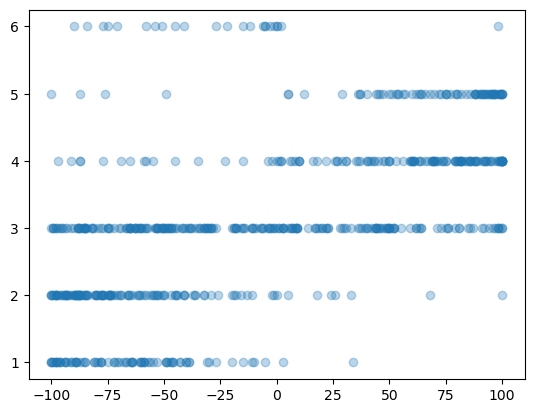

In [7]:
fig1, ax1 = plt.subplots()
ax1.scatter(ces['InterGBiasParty'], ces['ideo5'], alpha = .3)

plt.show()

In [8]:
model1 = smf.ols('InterGBiasParty ~ ideo5', data = ces)

In [9]:
fit1 = model1.fit()
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        InterGBiasParty   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.352
Method:                 Least Squares   F-statistic:                     358.6
Date:                Tue, 22 Oct 2024   Prob (F-statistic):           3.85e-64
Time:                        20:09:45   Log-Likelihood:                -3555.7
No. Observations:                 659   AIC:                             7115.
Df Residuals:                     657   BIC:                             7124.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -103.6421      5.422    -19.116      0.000    -114.288     -92.996
ideo5         30.7447      1.624     18.936      0.000      27.557      33.933
==============================================================================
Omnibus:                        7.584   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                7.676
Skew:                          -0.247   Prob(JB):                       0.0215
Kurtosis:                       2.813   Cond. No.                         9.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

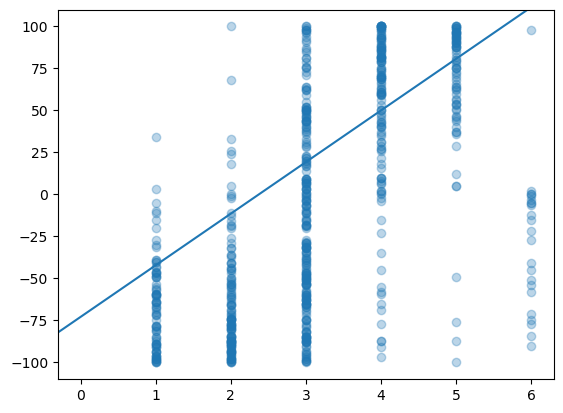

In [10]:
fig2, ax2 = plt.subplots()
ax2.scatter(ces['ideo5'], ces['InterGBiasParty'], alpha = .3)
ax2.axline((0, -72.8975), slope = 30.7447)
plt.show()

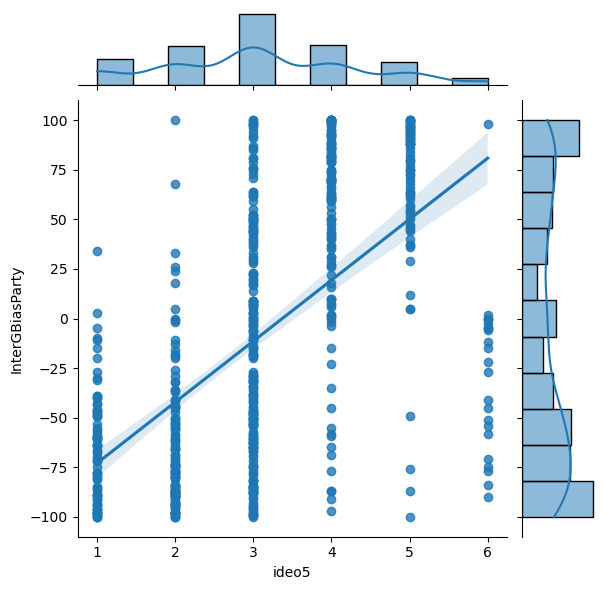

In [11]:
sns.jointplot(kind = 'reg', data = ces,
              x = 'ideo5', y = 'InterGBiasParty')

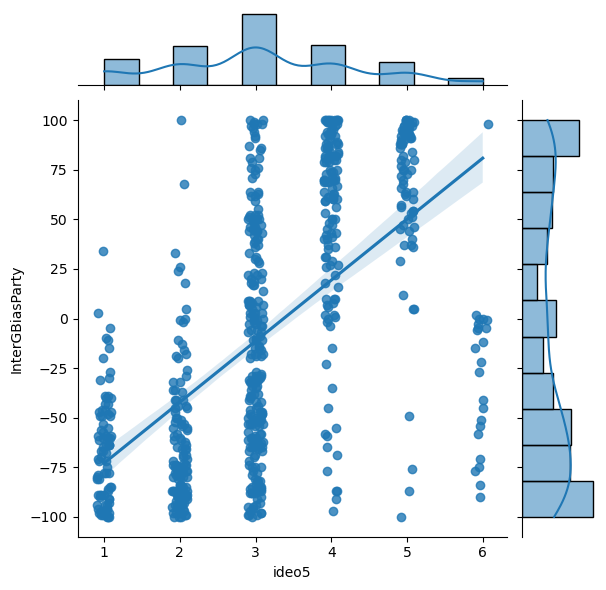

In [12]:
sns.jointplot(kind = 'reg', data = ces,
              x = 'ideo5', y = 'InterGBiasParty',
             x_jitter = .1)

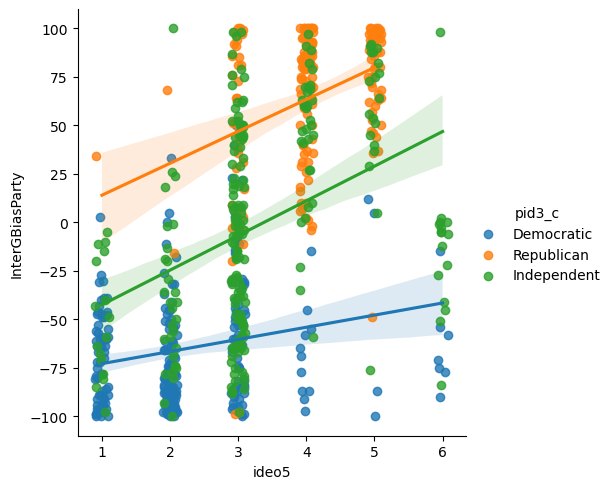

In [13]:
sns.lmplot(data = ces, x = 'ideo5',
          y = 'InterGBiasParty',
          hue = 'pid3_c', x_jitter = .1)

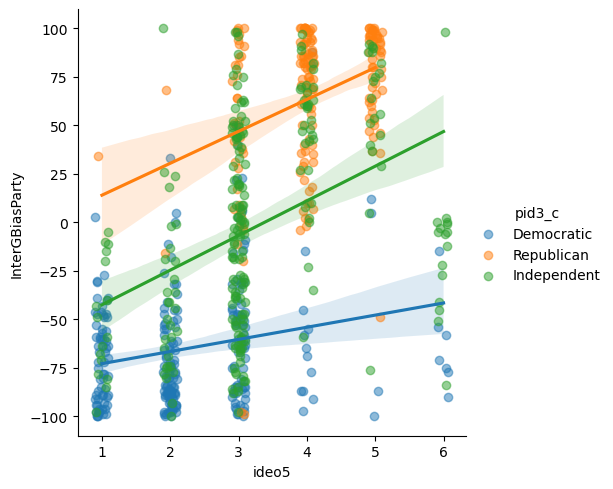

In [14]:
sns.lmplot(data = ces, x = 'ideo5',
          y = 'InterGBiasParty',
          hue = 'pid3_c', x_jitter = .1,
          scatter_kws={'alpha':0.5})

plt.show()

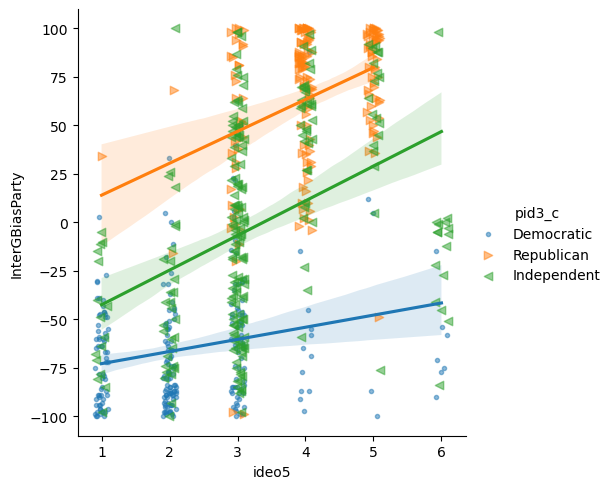

In [15]:
sns.lmplot(data = ces, x = 'ideo5',
          y = 'InterGBiasParty',
          hue = 'pid3_c', x_jitter = .1,
          scatter_kws={'alpha':0.5},
          markers = ['.', '>', '<'])

In [16]:
model2 = smf.ols('InterGBiasParty ~ ideo5 * pid3_c', data = ces)
fit2 = model2.fit()
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        InterGBiasParty   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     233.5
Date:                Tue, 22 Oct 2024   Prob (F-statistic):          9.65e-143
Time:                        20:11:49   Log-Likelihood:                -3361.4
No. Observations:                 659   AIC:                             6735.
Df Residuals:                     653   BIC:                             6762.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                     -79.0931      5.693    -13.893      0.000     -90.272     -67.914
pid3_c[T.Republican]           76.6511     17.026      4.502      0.000      43.220     110.083
pid3_c[T.Independent]          18.7322      9.455      1.981      0.048       0.166      37.299
ideo5                           6.2546      2.244      2.787      0.005       1.848      10.662
ideo5:pid3_c[T.Republican]     10.1972      4.499      2.267      0.024       1.363      19.031
ideo5:pid3_c[T.Independent]    11.6112      3.132      3.708      0.000       5.462      17.760
==============================================================================
Omnibus:                        9.672   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               14.814
Skew:                           0.071   Prob(JB):                     0.000607
Kurtosis:                       3.721   Cond. No.                         45.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""